In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
challenge_set_df = pd.read_csv('data/challenge_set.csv')

In [63]:
# Find columns with NaN values
nan_columns = challenge_set_df.columns[challenge_set_df.isna().any()].tolist()

# Output the result
print("Columns with NaN values:", nan_columns)

for column in challenge_set_df.columns:
    print()
    df[column] = df[column].dropna()

Columns with NaN values: []


In [62]:
for column in challenge_set_df.select_dtypes(include=['int']).columns:
    print(f"{column = }")

label_encoders = {}
for column in challenge_set_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    challenge_set_df[column] = le.fit_transform(challenge_set_df[column])
    label_encoders[column] = le
    print("Label encoded:", column)

column = 'flight_id'
column = 'flight_duration'
column = 'taxiout_time'
column = 'flown_distance'
Label encoded: date
Label encoded: callsign
Label encoded: adep
Label encoded: name_adep
Label encoded: country_code_adep
Label encoded: ades
Label encoded: name_ades
Label encoded: country_code_ades
Label encoded: actual_offblock_time
Label encoded: arrival_time
Label encoded: aircraft_type
Label encoded: wtc
Label encoded: airline


In [5]:
features = challenge_set_df[['adep', 'country_code_adep', 'ades', 'country_code_ades', 'aircraft_type', 'wtc', 'airline']]  # Features
target = challenge_set_df['tow']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=True)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

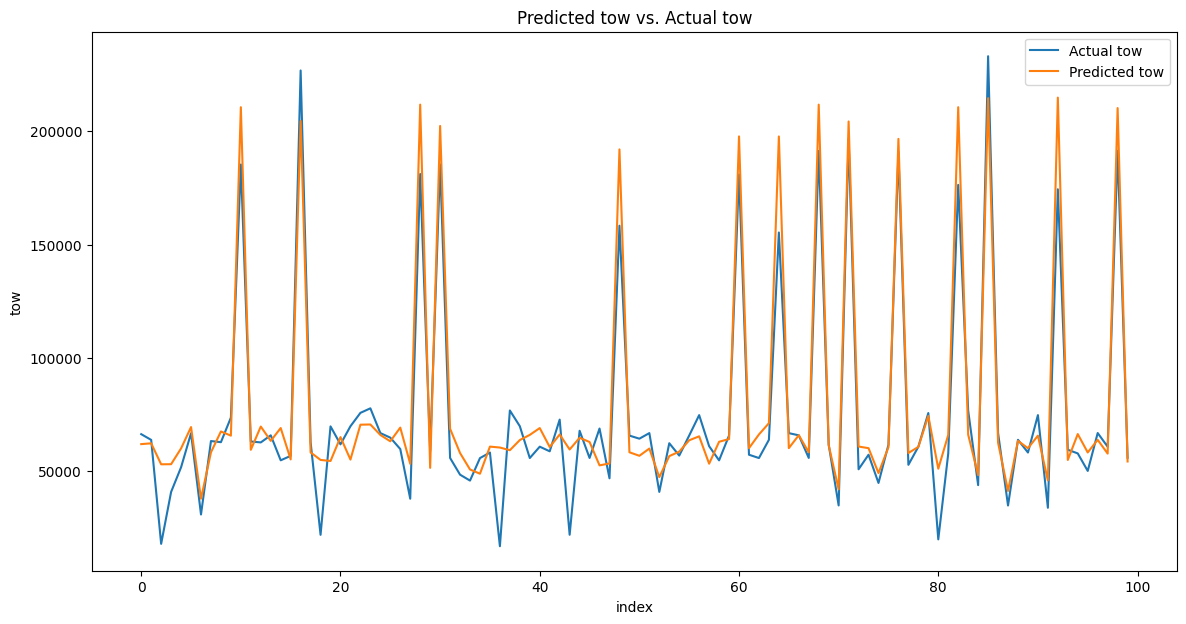

In [8]:
# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(list(range(0,100)), y_test[0:100], label='Actual tow')
plt.plot(list(range(0,100)), y_pred[0:100], label='Predicted tow')
plt.xlabel('index')
plt.ylabel('tow')
plt.title(f'Predicted tow vs. Actual tow')
plt.legend()
plt.show()

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 18321.879972268514


<h1>Grid Search using DecisionTreeRegressor()</h1>

In [52]:
param_grid = {
    'max_depth': [30, 60, 90],
    'min_samples_split': [10, 14, 18, 22],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt'],
    'criterion': ['squared_error', 'friedman_mse']
}

def rmse_scorer(y_true, y_pred):
    # Remove NaN values
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true_clean = y_true[mask]
    y_pred_clean = y_pred[mask]
    
    # Calculate RMSE
    mse = np.mean((y_true_clean - y_pred_clean) ** 2)
    rmse = np.sqrt(mse)
    return rmse
    
# Create a scorer
rmse_scorer = make_scorer(rmse_scorer, greater_is_better=False)

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=123)

# Set up GridSearchCV with custom scoring
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_grid=param_grid, 
    scoring=rmse_scorer, 
    cv=cv_strategy, 
    n_jobs=-1, 
    verbose=1
)

# Fit grid search
grid_search.fit(features, target)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\MOHAMMEDG\Anaconda3\envs\prc\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [30, 60, 90],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 14, 18, 22]},
             scoring=make_scorer(rmse_scorer, greater_is_better=False, response_method='predict'),
             verbose=1)

In [53]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative Mean Squared Error):", best_score)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 90, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 14}
Best Score (Negative Mean Squared Error): -4174.200943938006
